<a href="https://colab.research.google.com/github/NlilloC/NLP-y-Deep-Learning---Comision-61625-/blob/main/An%C3%A1lisis_NLP_Spiderman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis NLP - Películas Spiderman**

##**Objetivo**

Las películas de Spiderman, sin duda alguna, son una de las películas de superhéroes más importantes en los fanáticos del cine de acción. Es por ello, que a través del presente análisis se espera poder obtener un modelo que pueda predecir con un alto nivel de presición, cual es el sentimiento expresados por los usuarios al momento de referirse a las películas del "buen vecino" nuyorkino.

##**Lectura y análisis de datos**

###**Librerías necesarias**

In [44]:
import pandas as pd
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from wordcloud import WordCloud

import os
from collections import Counter

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
df_spider = pd.read_csv('https://github.com/NlilloC/NLP-y-Deep-Learning---Comision-61625-/raw/refs/heads/main/imdb-spider-man-reviews.csv')
df_spider

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse
...,...,...,...,...,...,...,...
21223,10.0,Marvel did the best spider ever,23 December 2021,0,7,Love what Marvel/Sony just did.\n\nVery good i...,Spider-Man: No Way Home
21224,10.0,spider man no way home,17 December 2021,0,4,This film is amazing! The best Spider-Man film...,Spider-Man: No Way Home
21225,10.0,Spiderman spiderman,14 January 2022,0,2,"One of the Marvel's masterpiece, Super Excelle...",Spider-Man: No Way Home
21226,9.0,Amazing!,19 December 2021,0,0,The originals have always been my fav Spiderma...,Spider-Man: No Way Home


### **Columnas del dataset**

- Rating: Clasificación de la reseña entre 1 a 10, siendo 1 la más baja clasificación y 10 la mejor.
- Title: Título de la reseña.
- Date: Fecha en la que se realizó la reseña.
- Helpful_Vote: Número de votos útiles que recibió la reseña.
- Total_Vote: Número total de votos que recibió la reseña.
- Review: Reseña.
- Movie: Película a la cual se le realizó la reseña.

In [46]:
df_spider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21228 entries, 0 to 21227
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        20066 non-null  float64
 1   Title         21228 non-null  object 
 2   Date          21228 non-null  object 
 3   Helpful_Vote  21228 non-null  int64  
 4   Total_Vote    21228 non-null  int64  
 5   Review        21228 non-null  object 
 6   Movie         21228 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


Del análisis, es podible evidenciar que no existen valores nulos en el dataset, por lo que no es necesario efectuar algún procesamiento.

### **Distribución de las palabras en la columna "Revisión"**

Text(0, 0.5, 'Frecuencia')

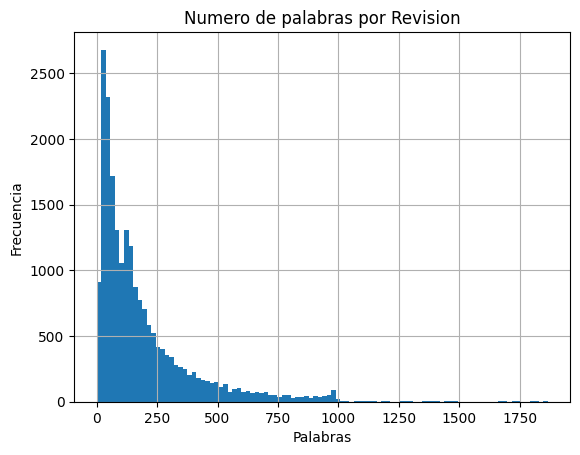

In [47]:
words_per_review = df_spider.Review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.title('Numero de palabras por Revision')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [48]:
words_per_review.mean()

191.67114188807236

Del análisis, es posible evidenciar que gran parte de los comentarios poseen como promedio, 200 palabras.

### **Distribución del "Rating"**

In [49]:
df_spider.Rating.value_counts()

,count
Rating,
10.0,6490
9.0,2918
8.0,2731
7.0,2111
6.0,1547
1.0,1243
5.0,1067
4.0,781
3.0,675


Gran parte de los comentarios poseen un rating mayor a 7.0, por lo que se podría afirmar en un comienzo, que el Dataset está compuesto en su mayoría por comentarios positivos.

### **Estantadrización de Rating para análisis de sentimiento**

In [50]:
df_spider['Sentiment_rating'] = np.where(df_spider.Rating > 5, 1, 0)
df_spider['Sentiment_rating'].value_counts()

,count
Sentiment_rating,
1,15797
0,5431


Las calificaciones se estandarizan para demostrar con valor 1 aquellos que presumirían un comentario positivo (calificaciones superiores a 5) y con valor 0 para aquellos que presumen un comentario negativo (calificaciones menores a 5).

## **Pre procesamiento con NLTK**

In [51]:
df_spider['Review_text_new'] = df_spider.Review.apply(lambda x: x.lower())

### **Remoción de caracteres especiales**

In [52]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

token_lists = [word_tokenize(each) for each in df_spider.Review]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in df_spider.Review_text_new]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Numero de tokens unicos nuevos: ", len(set(tokens_lower)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Numero de tokens unicos antes:  65311
Numero de tokens unicos nuevos:  54850


Con el tratamiento, se logró disminuir un total de 10.461 caracteres.

In [53]:
# Seleccionando los caracteres no alfa numericos que no son espacios
special_chars = df_spider.Review_text_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# obtener una lista de listas
flat_list = [item for sublist in special_chars for item in sublist]

# caracteres especiales unicos
print(set(flat_list))

{'\xad', '🌎', '¯', '🕷', '👊', '❌', '😌', '👑', '\ufeff', '🍪', '💀', '`', '💫', '️', '🙃', '\x97', '🕸', '🇮', '\x85', '😃', '✔', '·', '😉', '🎉', '¡', '$', '😇', '\x99', '👺', '"', '―', '☺', '*', '💖', '🌹', '{', '📣', '💝', '😥', '🤗', '➡', '😞', '£', '⭐', '😲', '🎬', '🏾', '✌', '🤷', '😍', '💬', '🤓', '😁', '❤', '，', '💜', '◽', '￼', '💕', '🍌', '🔜', '😫', '(', '´', '😮', '-', '✅', '\x91', '+', '/', '🙂', '😒', '👍', '😶', '<', '′', '°', '😀', '⚠', '😊', '&', '¿', '۞', '🗣', '🇵', '🤛', '}', ']', '🤡', '、', '🤣', '😘', '？', '🇰', '😔', '☆', '😝', '—', '»', '🙄', '®', '♀', '💩', '🎦', '🗽', '💙', '¨', '●', ',', '!', '⏳', ':', '⛔', '😱', '🎥', '🏻', '–', '★', '😅', '🐐', '\x96', '⚡', '😪', '🌍', '«', '😕', '>', '💯', '🤙', '😭', '^', '?', '💪', '.', '[', '🙌', '📵', '😂', '\\', '#', '=', '🤜', '🎭', '🌠', '💣', '%', '🌟', '😐', '😩', '🍿', '|', '♥', '💌', "'", '😟', '\uf04a', '\n', '🍾', '🤠', '😏', '😆', '🎵', '👨', '👎', '😳', '🏼', '👏', '👿', '@', '💥', '🙁', '♂', '″', '👌', '💔', '~', '\u200d', '👀', ')', '🙏', '😄', '😎', '🔥', '🇳', '🤔', '_', '×', '😜', '😢', '❗', '🌚', '🔰', '🇹',

In [54]:
import re
review_backup = df_spider.Review_text_new.copy()
df_spider.Review_text_new = df_spider.Review_text_new.apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)
)

In [55]:
print("Review anterior:")
review_backup.values[6]

Review anterior:


"the thing i hate about superhero movies is the origin story. after a multitude of spider-man stories, do we really need another retelling of his origin? that's the first - of many - things that spider-man: into the spider-verse does right. much like how grant morrison retold superman's beginnings in one page in all-star superman, this movie tells you everything you need to know within one minute and goes right into the action. it expects you to know the expected, but then once it makes you feel comfortable, it tears the rug out from under you.\n\nhere's the low down for those of you that don't read comics: there's more than one reality and more than one version of spider-man, who may not always be a man. written by phil lord and christopher miller, who left solo due to creative differences, this movie is pure joy from start to finish. if you know and love the characters, it's so amazing to see them treated properly on the big screen. and if you don't, it's so much fun to meet all new 

In [56]:
print("Review nuevo:")
df_spider.Review_text_new[6]

Review nuevo:


'the thing i hate about superhero movies is the origin story  after a multitude of spider man stories  do we really need another retelling of his origin  that s the first   of many   things that spider man  into the spider verse does right  much like how grant morrison retold superman s beginnings in one page in all star superman  this movie tells you everything you need to know within one minute and goes right into the action  it expects you to know the expected  but then once it makes you feel comfortable  it tears the rug out from under you here s the low down for those of you that don t read comics  there s more than one reality and more than one version of spider man  who may not always be a man  written by phil lord and christopher miller  who left solo due to creative differences  this movie is pure joy from start to finish  if you know and love the characters  it s so amazing to see them treated properly on the big screen  and if you don t  it s so much fun to meet all new vers

In [57]:
token_lists = [word_tokenize(each) for each in df_spider.Review]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos antes: ", len(set(tokens)))

token_lists = [word_tokenize(each) for each in df_spider.Review_text_new]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos despues: ", len(set(tokens)))

Numero de token unicos antes:  65311
Numero de tokens unicos despues:  39792


###**Remoción de stopword y palabras de alta frecuencia**

Con la finalidad de encontrar las palabras de alta y baja frecuencia, se utilizará lo siguiente: el 1 % de las palabras que aparecen con más frecuencia en las reseñas, así como el 1 % de las palabras que aparecen con menos frecuencia en las reseñas (después de ajustar por mayúsculas y minúsculas y caracteres especiales).

Todo lo anterior, es con la finalidad de agregar tanto las stopwords como las palabras de alta/baja frecuencia a las llamadas "noise_words", las cuales se eliminarán de las revisiones antes de entrenar los modelos de aprendizaje automático.

In [58]:
import nltk
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
noise_words

179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:10]

[('the', 241262),
 ('and', 121887),
 ('a', 101087),
 ('to', 93565),
 ('of', 87890),
 ('i', 75970),
 ('is', 72424),
 ('it', 71273),
 ('in', 59448),
 ('this', 53991)]

Text(0, 0.5, 'Frecuencia')

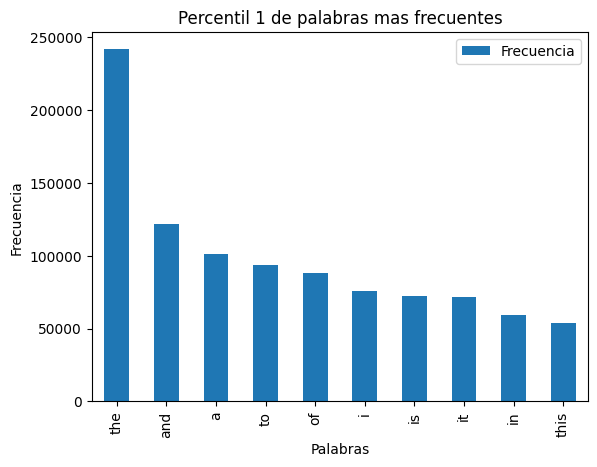

In [60]:
pd.DataFrame(top_1_percentile[:10], columns=['Palabras','Frecuencia']).set_index('Palabras').plot(kind='bar')
plt.title('Percentil 1 de palabras mas frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

Efectivamentem, una vez realizada la búsqueda de las palabras más frecuentes, tenemos que estas pertenecen a conectores, los cuales no ayudan a el análisis de sentimientos.

In [61]:
bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:10]

[('goooooo', 1),
 ('kala', 1),
 ('khaled', 1),
 ('cindi', 1),
 ('cubic', 1),
 ('domains', 1),
 ('clara', 1),
 ('col', 1),
 ('utc', 1),
 ('hbd', 1)]

In [62]:
noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

## **Stemming y Lemanización**

In [63]:
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer

nltk.download('wordnet')

from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Proveer una palabra que sera lemantizada
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [66]:
df_spider[['Review_text_new','Rating', 'Sentiment_rating']]

,Review_text_new,Rating,Sentiment_rating
0,spider man into the spider verse is a fanta...,10.0,1
1,the worlds of superhero movies and superhero c...,8.0,1
2,a movie worthy of stan lee s approval incredi...,10.0,1
3,so many have commented so i will be brief fr...,10.0,1
4,have you ever sat through a film and you knew ...,10.0,1
...,...,...,...
21223,love what marvel sony just did very good idea ...,10.0,1
21224,this film is amazing the best spider man film...,10.0,1
21225,one of the marvel s masterpiece super excelle...,10.0,1
21226,the originals have always been my fav spiderma...,9.0,1


## **Vectorización BOW**

In [67]:
# Creacion de metodo para stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [68]:
# Creacion de un objeto tipo CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 4)
)

In [69]:
reviews_train, reviews_test = train_test_split(df_spider, test_size=0.2, random_state=0)

In [70]:
X_train_bow = bow_counts.fit_transform(reviews_train.Review_text_new)
X_test_bow = bow_counts.transform(reviews_test.Review_text_new)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", "n't", 'sha', 'wo'] not in stop_words.
  warnings.warn(


In [71]:
X_train_bow = bow_counts.fit_transform(reviews_train.Review_text_new)
X_test_bow = bow_counts.transform(reviews_test.Review_text_new)

In [72]:
y_train_bow = reviews_train['Sentiment_rating']
y_test_bow = reviews_test['Sentiment_rating']

In [73]:
y_test_bow.value_counts() / y_test_bow.shape[0]

,count
Sentiment_rating,
1,0.737871
0,0.262129


Los datos presentan un 73,7% de opiniones positivas.

## **Modelado**

### **Regresión Logistica**

In [74]:
# Entrenar el modelo
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(X_train_bow, y_train_bow)

# Predecir el output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.8824860461608086
Accuracy:  81.65332077249175


In [75]:
test_pred_lr_prob

array([[0.45006082, 0.54993918],
       [0.02765517, 0.97234483],
       [0.03897232, 0.96102768],
       ...,
       [0.03198966, 0.96801034],
       [0.03242497, 0.96757503],
       [0.06974047, 0.93025953]])

In [76]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [77]:
predictions = pd.DataFrame()
predictions['Review'] = reviews_test['Review']
predictions['Actual_Score'] = reviews_test['Rating']
predictions['Sentiment_rating'] = reviews_test['Sentiment_rating']
predictions['Predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [78]:
predictions.head(5)

,Review,Actual_Score,Sentiment_rating,Predicted_sentiment,Predicted_probability
6084,No movie can live up to the hype. If you know ...,NaN,0,1,0.549939
816,Beautifully animated film which tells an inter...,9.0,1,1,0.972345
13399,Very enjoyable installment from everybody's fa...,9.0,1,1,0.961028
20401,"This movie made me cry, lough,clap, gave me go...",10.0,1,1,0.998433
18605,The first 20 minutes of the movie were a sense...,4.0,0,0,0.228874


In [79]:
accuracy_score(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

0.8165332077249176

In [80]:
predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].sort_values(by=["Predicted_probability"]).head(10)

,Review,Actual_Score,Sentiment_rating,Predicted_sentiment,Predicted_probability
5380,"Dumb, loud, and cynical blockbusters have long...",7.0,1,0,1.925367e-07
8125,Being a former avid comic book collector when ...,6.0,1,0,3.293010e-06
6089,"I am still 'iffy' on ""how"" Doc-Ock came to be....",6.0,1,0,8.397528e-06
7420,Spiderman 3 is directed by Sam Raimi and is th...,6.0,1,0,1.196663e-05
8240,"Good marks for special effects, low points for...",6.0,1,0,2.794743e-05
7029,Don't believe the hype - seldom has this sayin...,6.0,1,0,2.331157e-04
9173,Considering that only a mere ten years have pa...,6.0,1,0,2.708514e-04
8201,"First off, I'm a fan of comic books and I love...",6.0,1,0,2.895588e-04
15344,"OMG, the first hour thirty minutes was a total...",6.0,1,0,3.113955e-04
18220,This was a fan service movie. Though that isn'...,6.0,1,0,4.149614e-04


In [81]:
predictions.loc[5380].values

array(['Dumb, loud, and cynical blockbusters have long brutalized movie audiences. \'Spiderman 2\' illustrates that a superhero film can always stand to strike a chord of what vibrant, intelligent, and heartfelt popular film-making could look like. Directed by Sam Raimi and adapted from a story whose many scribes include the novelist Michael Chabon; the sole screenwriting credit belongs to Alvin Sargent, who wrote "Ordinary People" and "Paper Moon". The new Spider-Man 2 is replete with dazzling colors, deafening noises and elaborate special effects. Of course this is what we expected.\n\nWhat distinguishes this film, I am pleased to report, is solid character development with sincere emotions. Much like its Marvel Comic book kin, "X-Men 2," this sequel, free from the dreary weight of excessive exploitation, is somewhat better than its predecessor as well as better than most other comic-book-based feature films.\n\nHowever, what disturbs me about this Super hero is his lack of maturity,

Una vez realizado el entrenamiento, podemos evidenciar que un comentario que antes era calificado como positivo (calificación de 7.0) ahora el algoritmo lo reconoce como negativo, esto, considerando a que el párrafo posee frases con adjetivos de "Dumb, loud, cynical blockbusters", lo cual, el modelo aprendió a considerarlo como negativo.

In [82]:
lr_weights = pd.DataFrame(list(
    zip(
        bow_counts.get_feature_names_out(),
        lr_model_all.coef_[0])
    ),
    columns=['words','weights']
)

lr_weights.sort_values(['weights'],ascending = False)[:15]

,words,weights
1236100,masterpiece,0.878808
249354,brilliant,0.864100
1172488,level,0.859150
737063,family,0.856361
646759,endgame,0.851363
1470556,perfectly,0.850305
1978521,surprises,0.761278
1871828,spectacular,0.736672
1865302,soundtrack,0.717624
894566,greatest,0.717623


In [83]:
lr_weights.sort_values(['weights'],ascending = False)[-15:]

,words,weights
565704,disappointment,-1.115753
1942619,stupid,-1.164774
2232489,whatsoever,-1.168363
1301860,money,-1.188833
2026109,terrible,-1.189544
444966,crap,-1.304440
2267013,worse,-1.371625
336941,children,-1.373747
336296,childish,-1.413159
232809,boring,-1.540953


### **Random Forest**

In [86]:
rf_model_all = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)

# Entrenamiento
rf_model_all.fit(X_train_bow, y_train_bow)

# predicciones
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

In [87]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.8491665537335682
Accuracy:  73.78709373528027


In [88]:
feature_importances = pd.DataFrame(
    rf_model_all.feature_importances_,
    index=bow_counts.get_feature_names_out(),
    columns=['importance']
)

In [89]:
feature_importances.sort_values(['importance'], ascending=False)[:10]

,importance
stupid,0.011886
save,0.006875
dumb,0.005818
annoying,0.005802
worse,0.005798
money,0.005665
boring,0.005517
awful,0.005439
joke,0.005414
attempt,0.005291


Comparando los Accuracy entre ambos modelos, es posible constatar que Regresión Logística (81.65) tendría un mejor desempeño.

## **Vectorización TF-IDF**

In [91]:
tfidf_counts = TfidfVectorizer(
    stop_words=noise_words,
    ngram_range=(1,1)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.Review_text_new)
X_test_tfidf = tfidf_counts.transform(reviews_test.Review_text_new)

###**Regresión Logística**

In [92]:
# Crear el clasificador
lr_model_tf_idf = LogisticRegression(C=1, solver="liblinear")

# Entrenar
lr_model_tf_idf.fit(X_train_tfidf, y_train_bow)

# Predecir
test_pred_lr_prob = lr_model_tf_idf.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluar el modelo
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.8884266825137423
Accuracy:  82.312764955252


### **Random Forest**

In [93]:
rf_model_tf_idt = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)

# Entrenamiento
rf_model_tf_idt.fit(X_train_bow, y_train_bow)

# predicciones
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

In [94]:
print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.8491665537335682
Accuracy:  73.78709373528027


Con la Vectorización TF-IDF el mejor modelo sigue siendo Regresión Logística, mostrando una pequeña mejora que con el anterior método de vectorización, tanto en Accuracy como en el indicador F1 score.

In [95]:
tfidf_counts = TfidfVectorizer(
    stop_words=noise_words,
    ngram_range=(1,3)
)

X_train_tfidf = tfidf_counts.fit_transform(reviews_train.Review_text_new)
X_test_tfidf = tfidf_counts.transform(reviews_test.Review_text_new)

In [96]:
# definiendo la clase del modelo
lr_model_tf_idf_new = LogisticRegression(C=1, solver="liblinear")

# Entrenar
lr_model_tf_idf_new.fit(X_train_tfidf, y_train_bow)

# Predecir
test_pred_lr_prob = lr_model_tf_idf_new.predict_proba(X_test_tfidf)
test_pred_lr_all = lr_model_tf_idf_new.predict(X_test_tfidf)

# Evaluar el modelo
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all)*100)

F1 score:  0.8891229125921468
Accuracy:  82.64248704663213


Aumentando los n-gramas no existe una clara mejora de los indicadores, pero sigue demostrando que el método TF-IDF tendría mejor rendimiento.

## **Conclusiones**

Al realizar un análisis de sentimientos a los comentarios de usuarios a las películas de Spiderman, se puede concluir que el método de vectorización **IT-IDF** tendría un mejor rendimiento, utilizando un modelo de Regresión Logística, puydiendo obtener una precisión de **88,9%**.